# Biometric Prediction on Keystroke Dynamics

This project takes a look at a biometric classifier with keystroke dynamics. Besides typing a password to validate a user, it is possible to discriminate users by their typing rhythms. This features can be used to detect impostors. This project is based on the data set of the publication _Killourhy, K. S., & Maxion, R. A. [Comparing anomaly detectors for keystroke dynamics.](http://www.cs.cmu.edu/%7Emaxion/pubs/KillourhyMaxion09.pdf) In Proc. of the Int. Conf. on Dependable Systems and Networks (DSN) (pp. 125-134)_. The objective is to build a classification baser on neural networks with the [keras](https://keras.io/) library.

The [data set](https://www.cs.cmu.edu/~keystroke/) consists of 51 subject each typing the password `.tie5Roanl` 400 times. The measures collected are the hold time (H), keydown-keydown time (DD) and keyup-keydown time (UD).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/DSL-StrongPasswordData.csv')
subject = df['subject']
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,2,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,2,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,2,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,2,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [3]:
data, y = utils.load_data()

# One hot encoding
Y = pd.get_dummies(y).values
n_classes = Y.shape[1]

## Explore the Data Set

In this section we will explore the various feature sets of the keystroke dynamics data set.

### Latency (Keydown-Keydown)

This is a classical keystroke feature vector which consists of the durations between the key-down of one key to the key-down of the next key, denoted in this data set as `DD`.

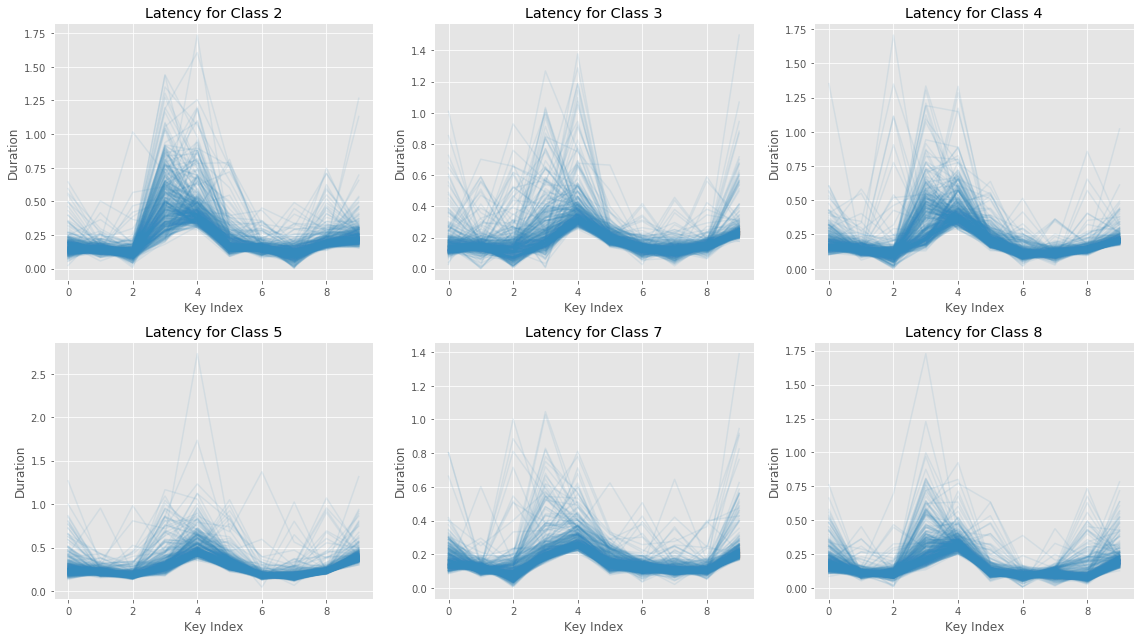

In [4]:
df_plot = data['DD'].copy()

plt.figure(figsize=(16, 9))
for i, y0 in enumerate(np.unique(y)[:6]):
    plt.subplot(2, 3, i + 1)
    for x in df_plot[y == y0].values:
        plt.plot(x, color='C1', alpha=0.1)
    plt.title('Latency for Class {}'.format(y0))
    plt.xlabel('Key Index')
    plt.ylabel('Duration')
plt.tight_layout()

### Average Latency per Class

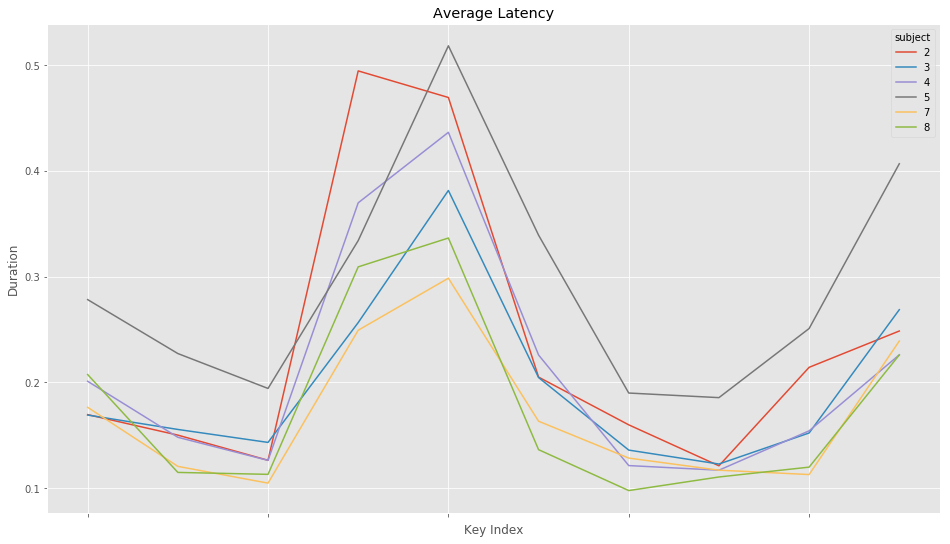

In [5]:
df_plot = data['DD'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(16, 9), title='Average Latency')
plt.xlabel('Key Index')
plt.ylabel('Duration');

### Pressure Duration (Hold)

This feature vector consists of the durations of key-down to key-up of a single key and is denoted as `H` in the data set.

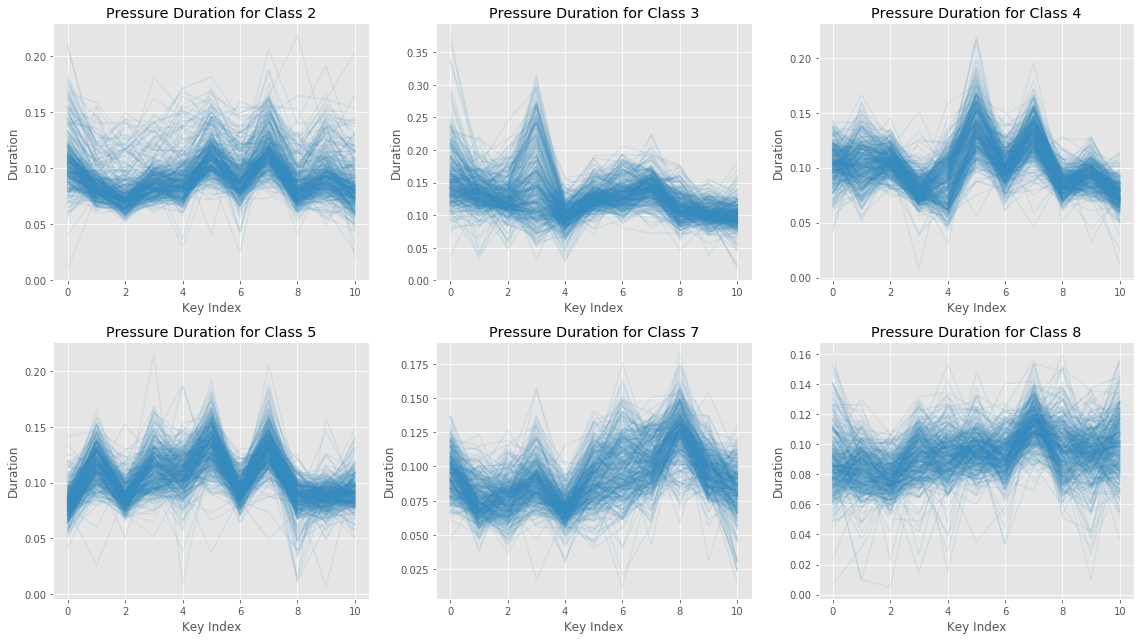

In [6]:
df_plot = data['H'].copy()

plt.figure(figsize=(16, 9))
for i, y0 in enumerate(np.unique(y)[:6]):
    plt.subplot(2, 3, i + 1)
    for x in df_plot[y == y0].values:
        plt.plot(x, color='C1', alpha=0.1)
    plt.title('Pressure Duration for Class {}'.format(y0))
    plt.xlabel('Key Index')
    plt.ylabel('Duration')
plt.tight_layout()

### Average Pressure Duration per Class

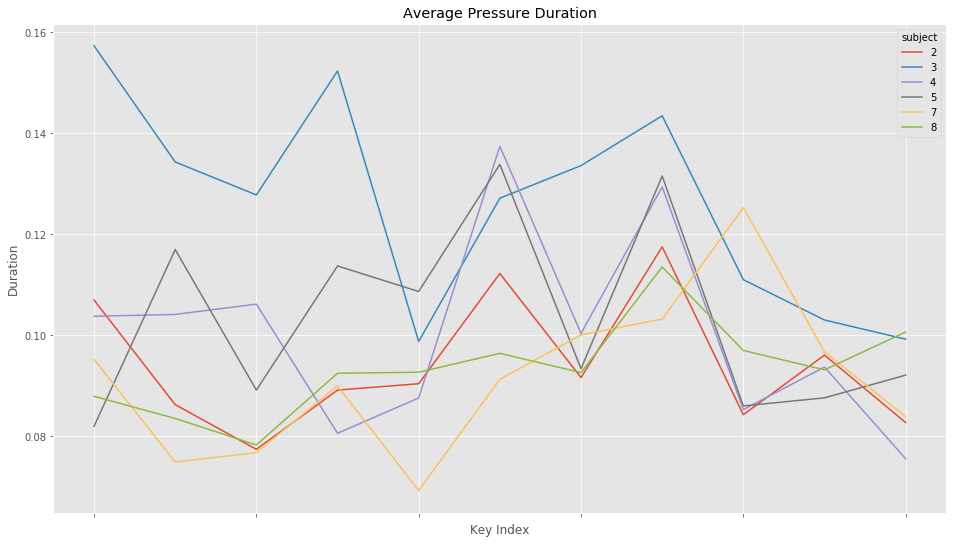

In [7]:
df_plot = data['H'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(16, 9), title='Average Pressure Duration')
plt.xlabel('Key Index')
plt.ylabel('Duration');

### Keyup-Keydown

Duration between the release of one key and the press of the next key.

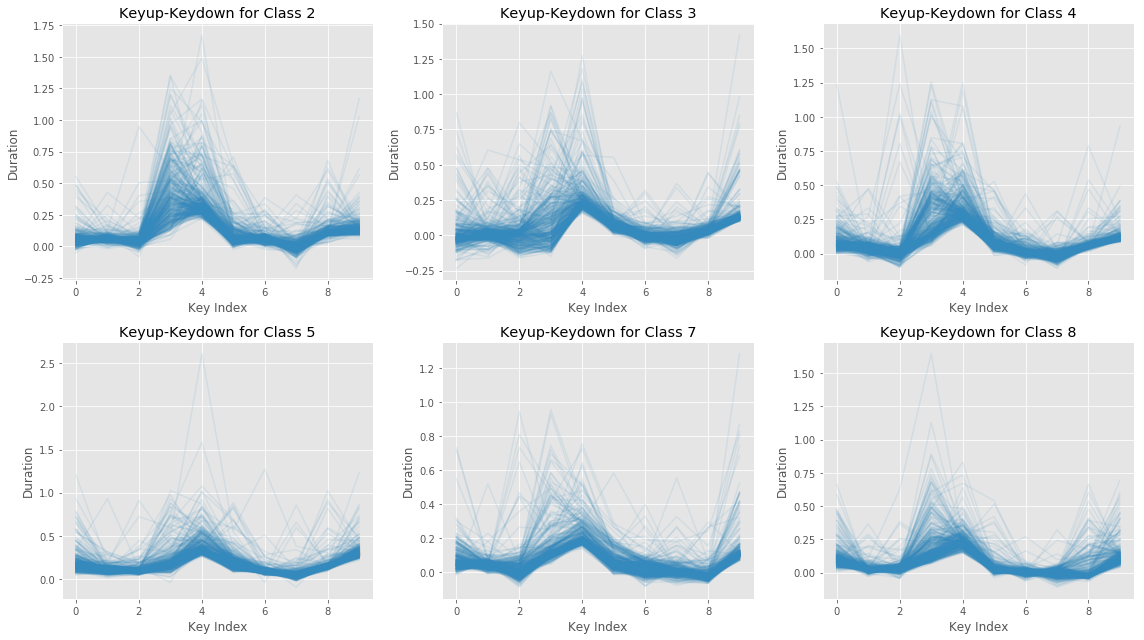

In [8]:
df_plot = data['UD'].copy()

plt.figure(figsize=(16, 9))
for i, y0 in enumerate(np.unique(y)[:6]):
    plt.subplot(2, 3, i + 1)
    for x in df_plot[y == y0].values:
        plt.plot(x, color='C1', alpha=0.1)
    plt.title('Keyup-Keydown for Class {}'.format(y0))
    plt.xlabel('Key Index')
    plt.ylabel('Duration')
plt.tight_layout()

### Average Keyup-Keydown Duration per Class

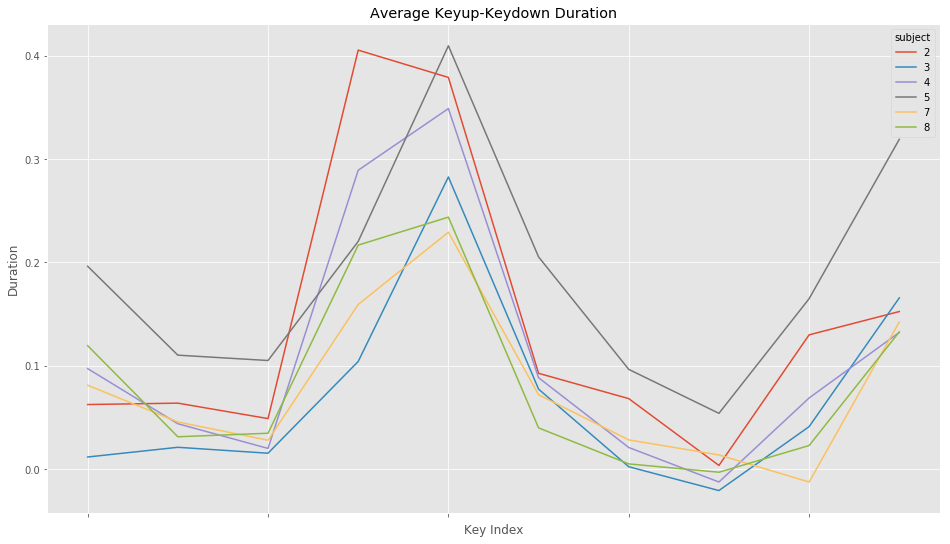

In [9]:
df_plot = data['UD'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(16, 9), title='Average Keyup-Keydown Duration')
plt.xlabel('Key Index')
plt.ylabel('Duration');

## Cluster the Data Set with T-SNE

In [10]:
from sklearn.manifold import TSNE

# Create the subset of the first 10 classes
classes = np.unique(y)[:10]
mask = [y0 in classes for y0 in y]

X_tsne = data['total'].values[mask]
y_subset = y[mask]

tsne = TSNE(n_components=2, learning_rate=1000, perplexity=8)
X_embedded = tsne.fit_transform(X_tsne)

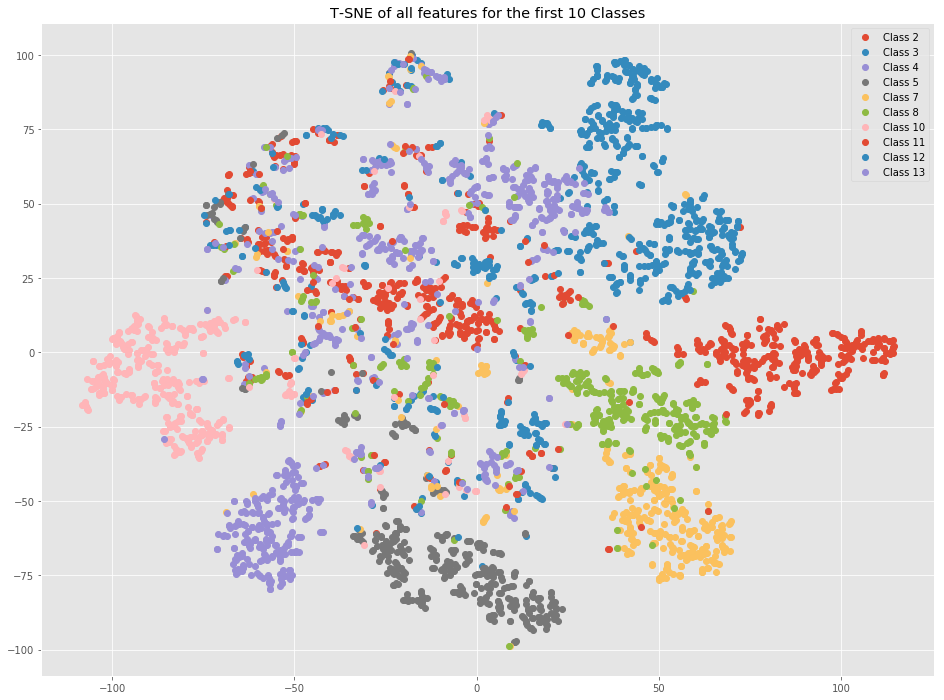

In [11]:
plt.figure(figsize=(16, 12))
for y0 in classes:
    label = 'Class {}'.format(y0)
    plt.plot(X_embedded[y_subset == y0][:, 0], 
             X_embedded[y_subset == y0][:, 1], 
             'o', label=label)

plt.title('T-SNE of all features for the first 10 Classes')
plt.legend();

## Classify the Data Set with K-Nearest Neighbor as Baseline Performance

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()

for key in data:
    scores = cross_val_score(clf, data[key], y, cv=5)
    print("Accuracy for {:5s} : {:0.2f} (+/- {:0.2f})".format(
        key, scores.mean(), scores.std() * 2))

Accuracy for total : 0.69 (+/- 0.25)
Accuracy for H     : 0.65 (+/- 0.12)
Accuracy for DD    : 0.55 (+/- 0.20)
Accuracy for UD    : 0.60 (+/- 0.23)
Accuracy for pca3  : 0.19 (+/- 0.09)
Accuracy for pca10 : 0.58 (+/- 0.22)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = data['total']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=y)

n_neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10]

parameters = dict(n_neighbors=n_neighbors)

clf = KNeighborsClassifier()

grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(X_train, Y_train)

# Get results
results = grid.cv_results_

# Following code snippet adapted from: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
for i in range(1, 4):
    candidates = np.flatnonzero(results['rank_test_score'] == i)
    for candidate in candidates:
        print("Model with rank: {}".format(i))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
        print("Parameters: {}".format(results['params'][candidate]))
        print()

Model with rank: 1
Mean validation score: 0.696 (std: 0.008)
Parameters: {'n_neighbors': 3}

Model with rank: 2
Mean validation score: 0.665 (std: 0.008)
Parameters: {'n_neighbors': 5}

Model with rank: 3
Mean validation score: 0.644 (std: 0.007)
Parameters: {'n_neighbors': 7}



### Show ROC Curve, AUC and EER

In [14]:
from sklearn.metrics import accuracy_score, roc_curve, auc

Y_pred = grid.predict(X_test)
print('Test accuracy : {}'.format(accuracy_score(Y_test, Y_pred)))

Test accuracy : 0.7220588235294118


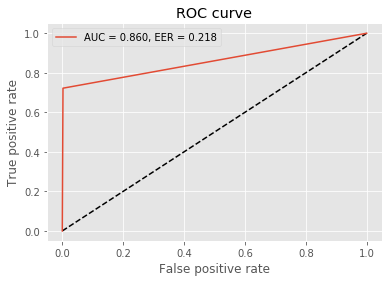

In [15]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

Y_pred = grid.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())

# Calculate equal-error-rate
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}, EER = {:.3f}'.format(auc(fpr, tpr), eer))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Evaluate Neural Network Models

Various models have been trained with [calculate_models.py](calculate_models.py) whose results will be evaluated in this section. The models have two hidden layers with `ReLU` activation function and `softmax` activation function for the output layer. Additionally both hidden layer employ a [Dropout](http://jmlr.org/papers/v15/srivastava14a.html) layer with 20% dropout rate to help against overfitting. The network was tested for 50, 100, 150, 200, 250 and 300 nodes for each hidden layer. The optimization algorithm used is [Adam](https://arxiv.org/abs/1412.6980), a first-order gradient-based optimization of stochastic objective functions.

### Load Neural Network Models

Load neural networks for the various data sets and different number of nodes. The models for the highest number of nodes will be further evaluated by their accuracy.

In [16]:
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from collections import defaultdict
from sklearn.preprocessing import normalize

key_list = ['total', 'H', 'DD', 'UD', 'pca3', 'pca10']
nodes_list = [50, 100, 150, 200, 250, 300]
models_dict = defaultdict(dict)

for key in key_list:
    X = data[key]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=1, stratify=y)
        
    for nodes in nodes_list:
        json_filepath = 'models/model_{}_{}.json'.format(key, nodes)
        hdf5_filepath = 'models/model_{}_{}.h5'.format(key, nodes)
        with open(json_filepath, 'r') as f:
            model = model_from_json(f.read())
            model.load_weights(hdf5_filepath)
            model.compile(loss='categorical_crossentropy',
                          optimizer='adam', metrics=['accuracy'])
            if nodes == 300:
                print('Data : {:>5s}, Nodes : {}'
                      .format(key, nodes))
                score = model.evaluate(normalize(X_train), 
                                       Y_train, verbose=0)
                print('  Accuracy for train set : {:.4f}'
                      .format(score[1]))
                score = model.evaluate(normalize(X_test), 
                                       Y_test, verbose=0)
                print('  Accuracy for test set  : {:.4f}'
                      .format(score[1]))
            
            models_dict[key][nodes] = model

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Data : total, Nodes : 300
  Accuracy for train set : 0.9871
  Accuracy for test set  : 0.8973
Data :     H, Nodes : 300
  Accuracy for train set : 0.7573
  Accuracy for test set  : 0.6260
Data :    DD, Nodes : 300
  Accuracy for train set : 0.7688
  Accuracy for test set  : 0.6392
Data :    UD, Nodes : 300
  Accuracy for train set : 0.8962
  Accuracy for test set  : 0.7225
Data :  pca3, Nodes : 300
  Accuracy for train set : 0.2106
  Accuracy for test set  : 0.2130
Data : pca10, Nodes : 300
  Accuracy for train set : 0.9381
  Accuracy for test set  : 0.7350


## ROC Curves, AUC and EER for each Data Set

Calculate the micro-averaged ROC (Receiver Operating Characteristic) Curve over all classes for each data set. There is also the way to calculate a macro-averaging evaluation which gives equal weight to the classification of each label. This can be found in this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

Further we calculate the AUC (Area Under the Curve) which measures the area under the ROC curve. The EER (Equal Error Rate) is the interception between the diagonal from (0, 1) to (1, 0) with the ROC curve. EER is a biometric security system measure used to get the error rate for equal false acceptance rate and false rejection rate.

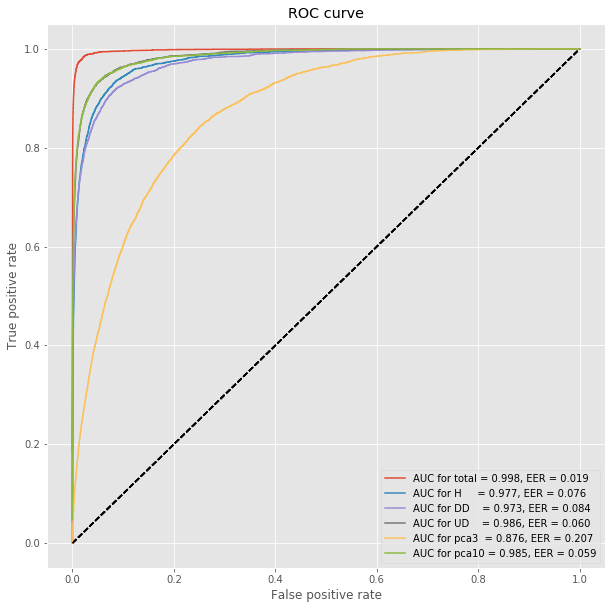

In [17]:
from sklearn.metrics import accuracy_score, roc_curve, auc

plt.figure(figsize=(10, 10))
for i, key in enumerate(key_list):
    X = data[key]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=1, stratify=y)
    
    model = models_dict[key][nodes]
    Y_pred = model.predict(normalize(X_test))
    fpr, tpr, thresholds = roc_curve(
        Y_test.flatten(), Y_pred.flatten())
    
    # Calculate equal-error-rate
    eer = brentq(lambda x : 1.0 - x - interp1d(fpr, tpr)(x), 0.0, 1.0)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC for {:5s} = {:.3f}, EER = {:.3f}'.format(
        key, auc(fpr, tpr), eer))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

### ROC Curve for each Class

Here we want to compare the ROC Curves for each class and how much variation can be seen within each data set.

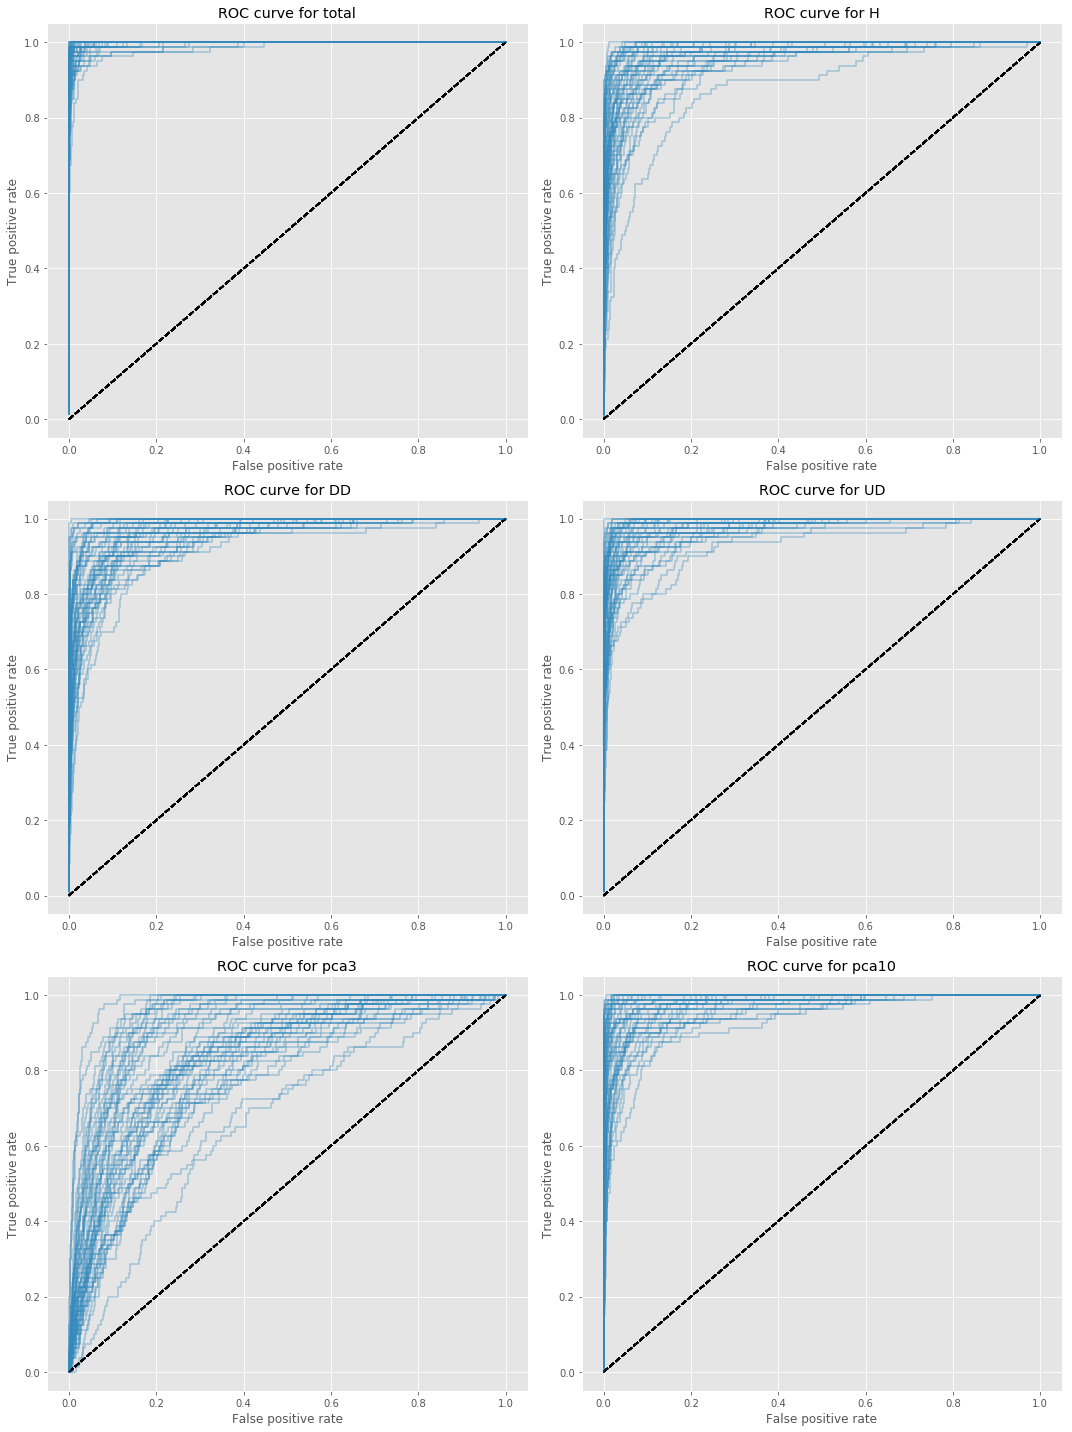

In [18]:
plt.figure(figsize=(15, 20))
for k, key in enumerate(key_list):
    X = data[key]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=1, stratify=y)

    model = models_dict[key][300]
    Y_pred = model.predict(normalize(X_test))

    fpr_dict, tpr_dict = {}, {}
    for i in range(n_classes):
        fpr_dict[i], tpr_dict[i], threshold = roc_curve(Y_test[:, i], Y_pred[:, i])

    plt.subplot(3, 2, k + 1)
    for i in range(n_classes):
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr_dict[i], tpr_dict[i], color='C1', alpha=0.4)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for {}'.format(key));
plt.tight_layout()

## Normalized Confusion Matrix

Calculate the normalized confusion matrix of the data set. The diagonal represents the normalized number of points where the predicted label is equal to the true label. The off-diagonal elements are the mislabeled elements by the model. The normalization is based on the number of elements for each class. In this case it would not make visually a difference since the data set is perfectly balanced for each class.

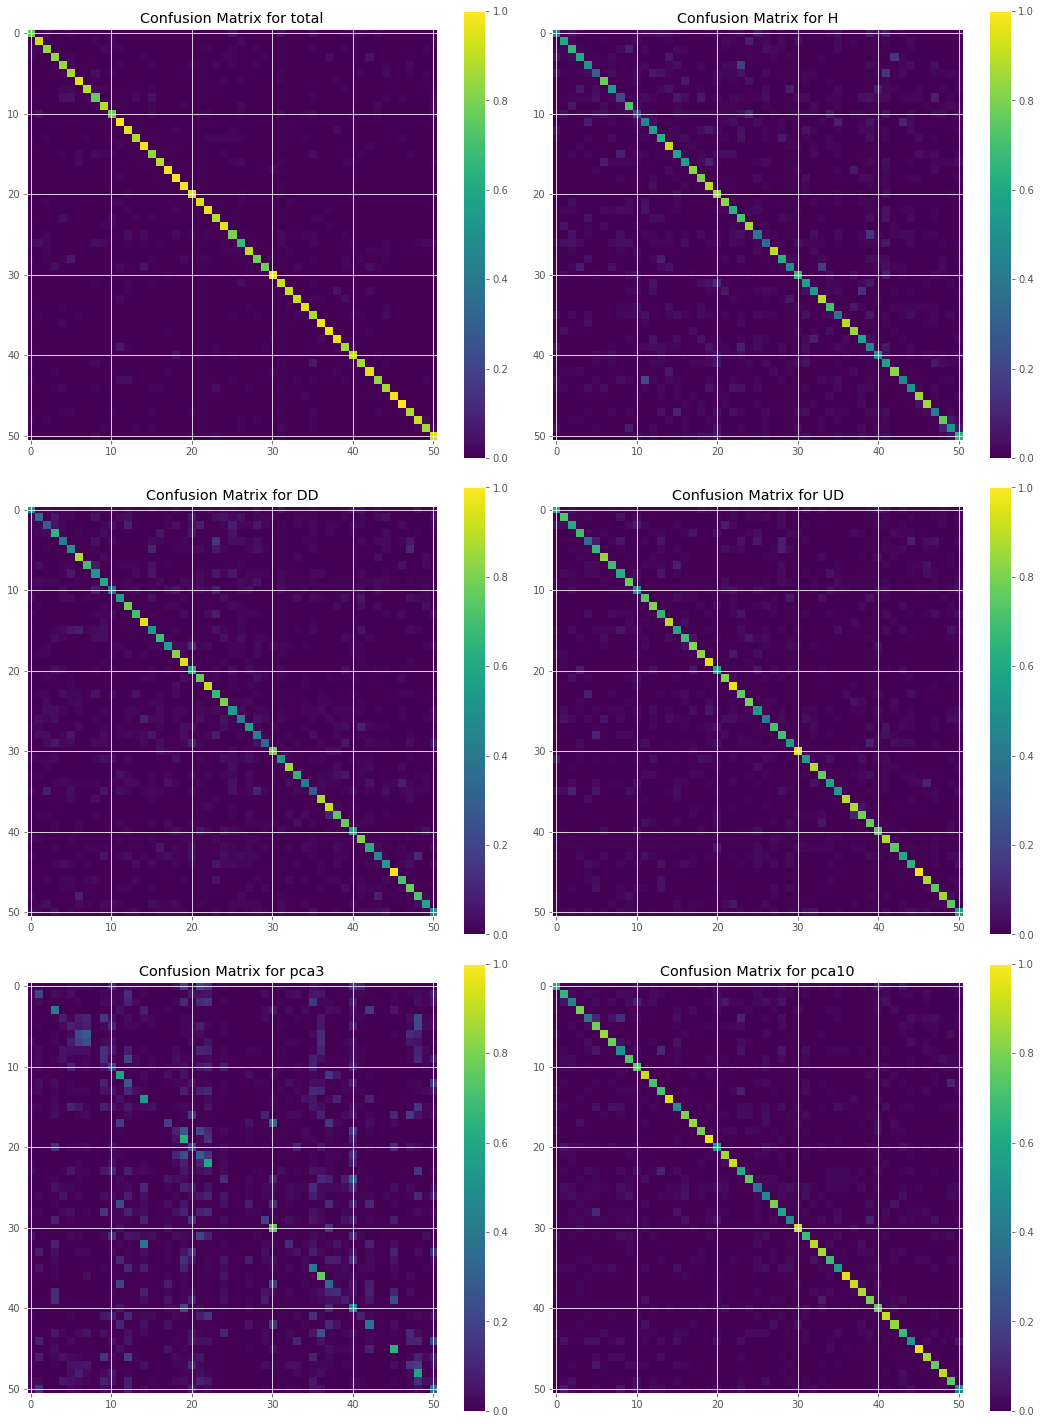

In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 20))
for i, key in enumerate(key_list):
    X = data[key]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=1, stratify=y)

    model = models_dict[key][300]
    Y_pred = model.predict(normalize(X_test))

    C = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
    
    # Normalize confusion matrix
    C = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
    
    plt.subplot(3, 2, i + 1)
    plt.imshow(C, vmin=0, vmax=1)
    plt.colorbar()
    plt.title('Confusion Matrix for {}'.format(key))
plt.tight_layout()

## Conclusion

In this project an accuracy of 89.73% could be reached for the best model as compared to 72.20% for the K-Nearest Neighbors baseline model. There are further methods to evaluate the performance more in depth, namely

- Detection Error Trade-Off Curve (DET)
- Cumulative Match Characteristic (CMC) Probability of identification for numerous ranks X, i.e. the probability that the correct match is somewhere in the top X similarity scores
- False Match Rate (FMR) or also false positive rate (FPR)
- False Non-Match Rate (FNMR) or also false negative rate (FNR)
- Equal Error Rate (EER) threshold where FMR and FNMR reach identical value